[[ 0.          0.          0.        ]
 [ 0.00161655  0.01203671 -0.00312376]
 [ 0.00137942  0.0217604  -0.00552915]
 [ 0.01373802  0.04547567 -0.0123858 ]
 [ 0.0189231   0.0611663  -0.01669337]
 [ 0.01701794  0.07016018 -0.01878921]
 [ 0.01230006  0.07529875 -0.01970888]
 [ 0.00570348  0.07728646 -0.01969945]
 [ 0.0480609   0.13029494 -0.03615303]
 [ 0.05337126  0.1461016  -0.04049911]]


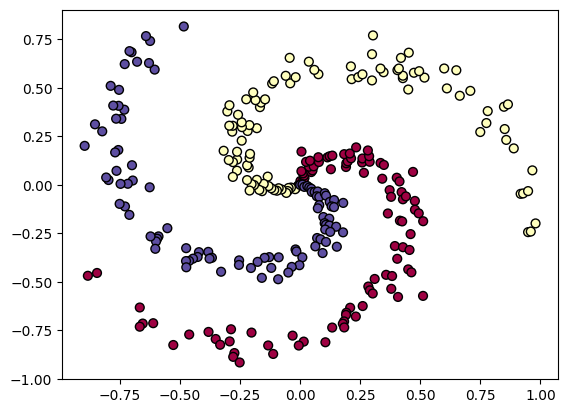

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
N = 100
D = 2
K = 3

# Initialize data and labels
X = np.zeros((N * K, D))  # Train Data
y = np.zeros(N * K, dtype="uint8")  # Label array

# Initialize weights and biases
W = np.random.randn(D, K)
W_Initial = np.copy(W)
b = np.zeros(K)

# Calculate initial scores

# Generate synthetic dataset, fill in X array with synthetic data values.
for j in range(K):
    ix = range(N * j, N * (j + 1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j

scores = np.dot(X, W) + b
print(scores[:10])
# Plot the synthetic dataset
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral,edgecolors="k")
plt.show()

In [22]:
# Data split function
def random_split_data(X, y, train_percentage=0.8, test_percentage=0.20):
    data_count = X.shape[0]
    indices = np.arange(data_count)
    np.random.shuffle(indices)

    # Split data into training and test sets
    train_count = int(data_count * train_percentage)
    test_count = int(data_count * test_percentage)
    print(train_count,
          test_count)
    train_indices = indices[:train_count]
    test_indices = indices[-test_count:]
    # Create sets
    XTrain, yTrain = X[train_indices], y[train_indices]
    XTest, yTest = X[test_indices], y[test_indices]

    return XTrain, yTrain, XTest, yTest

In [23]:
# Printing the generated parameters.
print("Weight matrix(random initialized):")
print(W)
print("scores:", scores.shape)

print("\n")
print("\nBias vector:")
print(b)

print("\n")
print("\nFirst 10 data")

print(X[10:])
print("\n")

print("\nLabel matrix")
print(y)

Weight matrix(random initialized):
[[ 1.03359279e+00  1.39898328e+00 -4.27786640e-01]
 [ 5.42568765e-04  9.87575942e-01 -2.46185952e-01]]
scores: (300, 3)



Bias vector:
[0. 0. 0.]



First 10 data
[[ 3.73865237e-02  9.38364980e-02]
 [ 5.64930476e-02  9.56776598e-02]
 [ 2.48742095e-02  1.18632424e-01]
 [ 4.12136453e-02  1.24677881e-01]
 [ 7.81386886e-02  1.17865622e-01]
 [ 1.28224669e-01  8.07172563e-02]
 [ 7.60393074e-02  1.42610685e-01]
 [ 5.75941196e-03  1.71620559e-01]
 [ 1.13763927e-01  1.41829546e-01]
 [ 1.22836153e-01  1.47459336e-01]
 [ 1.34142148e-01  1.51056434e-01]
 [ 1.91017059e-01  9.22382335e-02]
 [ 1.92275197e-01  1.11413486e-01]
 [ 1.98162926e-01  1.21266397e-01]
 [ 1.83508540e-01  1.58411266e-01]
 [ 2.12130055e-01  1.37003076e-01]
 [ 2.06910901e-01  1.61741871e-01]
 [ 2.65543973e-01  6.21816971e-02]
 [ 2.58176136e-01  1.15485586e-01]
 [ 2.59396518e-01  1.36091943e-01]
 [ 2.33264568e-01  1.93429589e-01]
 [ 2.89528986e-01  1.19265191e-01]
 [ 2.87377703e-01  1.47963478e-

In [24]:
# I have X, y, W defined before the functions
# With D and K are defined appropriately,
# Calculating loss and accuracy.

def svm_loss(X, y, W):
    """
    SVM loss function.

    Parameters:
    - X: Input data (N, D).
    - y: Ground truth labels (N,).
    - W: Weight matrix (D, K).

    Returns:
    - loss: SVM loss.
    - dW: Gradient of the loss with respect to W.
    """

    data_count = X.shape[0]  # This is total data count
    delta = 1.0  # This is a hyperparameter representing the margin.

    # Compute scores. Each row of scores matrix corresponds to a different input example,
    # and each column of scores matrix corresponds to a different class.
    scores = X.dot(W)+b

    # Compute the margins for all classes. Implementing the hinge loss in a multiclass
    # Support Vector Machine (SVM) classification setting. The reshape(-1, 1) operation
    # is used to ensure that the subtraction is broadcasted correctly. Reshaped the matrix
    # to 1 column vector. Each element in array turned in to another array and put in a
    # new vector that has 1 column.
    margins = np.maximum(
        0, scores - scores[range(data_count), y].reshape(-1, 1) + delta)

    # Ignore the correct class by setting the margins for correct class to zero
    margins[range(data_count), y] = 0

    # Compute the loss
    # Applying SVM Loss formula. To normalize the output, loss is divided by num_train.
    # The SVM loss is typically defined as the sum of margins, and dividing by the number
    # of training examples (num_train) is a way to obtain an average loss per training example.
    loss = np.sum(margins) / data_count

    return loss


def CrossEntropyLoss(X, y, W):
    """
    Cross-entropy loss function.

    Parameters:
    - X: Input data (N, D).
    - y: Ground truth labels (N,).
    - W: Weight matrix (D, K).

    Returns:
    - loss: Cross-entropy loss.
    - dW: Gradient of the loss with respect to W.
    """
    # num_train is total data count. X is in shape (300, 2). There are 100 data for each
    # class and 300 total data. Each point has x and y value, this points are stored for
    # each 300 point.
    num_train = X.shape[0]

    # Computing scores. Dot production of W and data gives a score vector. Each data has
    # assigned a score based on the random initialized weight matrix.
    scores = X.dot(W)

    # Softmax function to get probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    # Compute cross-entropy loss
    correct_logprobs = -np.log(probs[range(num_train), y])
    loss = np.sum(correct_logprobs) / num_train

    return loss


def calculate_accuracy(X, y, W):
    """
    Calculate the accuracy of the model with weight matrix W.

    Parameters:
    - X: Input data (N, D).
    - y: Ground truth labels (N,).
    - W: Weight matrix (D, K).

    Returns:
    - accuracy: Accuracy of the model.
    """
    data_count = X.shape[0]

    # Calculate scores
    scores = X.dot(W) + b

    max_Scores = np.argmax(scores, axis=1)
    # Predicted labels
    # This line finds the index of the maximum value along axis 1 (across columns) in the
    # scores matrix. In the context of classification problems, this index corresponds to
    # the predicted class label for each data point.

    correct_Scores = np.sum(max_Scores == y)
    # Compare with true labels
    # The expression predicted_labels == y creates a boolean array where each element is
    # True if the predicted label matches the true label and False otherwise. The np.sum
    # function then counts the number of correct predictions.

    accuracy = correct_Scores / data_count
    # Calculate accuracy
    # Finally, the accuracy is calculated by dividing the number of correct predictions
    # by the total number of data points.
    return accuracy


LossCE = CrossEntropyLoss(X, y, W)
print('Cross Entropy Loss Initial:', LossCE)

Cross Entropy Loss Initial: 0.9129446628253328


In [25]:
# Compute the analytic gradient with backpropagation
def ComputeGradient(X, y, W):
    """
    Compute the gradient of the cross-entropy loss with respect to the weights.

    Parameters:
    - X: Input data (N, D).
    - y: Ground truth labels (N,).
    - W: Weight matrix (D, K).

    Returns:
    - dW: Gradient of the loss with respect to W.
    """
    data_count = X.shape[0]

    # Compute scores
    scores = X.dot(W) + b

    # Softmax function to get probabilities
    exp_scores = np.exp(scores)
    # This line exponentiates the raw scores,
    # preparing them for the softmax transformation.
    # This line applies the softmax
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # function to the exponentiated scores, producing a matrix of probabilities where each row corresponds
    # to a training example, and each column corresponds to a class."axis=1, keepdims=True" means sum of
    # all elements in each row, represented with array of same dimension.

    # Compute the gradient

    # In the backpropagation step, you calculate the gradients of the loss with respect to the mode
    # l parameters. This involves computing the partial derivatives of the loss with respect to each
    # arameter.
    ds = probs

    # This variable is used to store the gradient of the loss with respect to the scores. It is in
    # itialized as the computed probabilities.
    ds[range(data_count), y] -= 1

    # This adjustment is made based on the ground truth labels (y). It represents the derivative o
    # f the cross-entropy loss with respect to the raw scores. In scores matrix, all the scores that
    # n the index of y, is decremented by 1. This adjustment is a way to combine the gradient of
    # the cross-entropy loss with respect to the scores during backpropagation
    ds /= data_count  # Normalization

    # The gradient is normalized by dividing it by the total number of training examples

    dW = X.T.dot(ds)

    # The gradient of the loss with respect to the weights (W) is calculated by taking the dot product
    # of the transposed input matrix (X.T) and the adjusted gradient (ds)
    # The dot product of the transposed input matrix ( X^T  ) and the adjusted gradient (ds) i
    # s involved in the calculation of the gradient ( ∂L/∂W  ) using the chain rule and the calculus
    # of multivariable functions. The chain rule states that if you have a composition of functions,
    # the derivative of the composition is the product of the derivatives of those functions.
    # During backpropagation, you want to compute the gradient of the loss with respect to the wei
    # ghts, i.e.,∂L/∂W  .According to the chain rule:

    # (∂L / ∂W)  =  (∂L / ∂p) . (∂p / ∂s) . (∂s / ∂W)

    """
    (∂L / ∂p) = Gradient of the loss with respect to the probabilities.
    (∂p / ∂s) = Gradient of the softmax function with respect to the scores.
    (∂s / ∂W) = Gradient of the linear transformation with respect to the weights.
    """

    # where,
    # p is the matrix of class probabilities​ and s is the score matrix.
    # The term, "∂L / ∂p" (Gradient of the loss with respect to the probabilities), is represented by
    # "ds" in the code. The term "∂p / ∂s" is essentially the softmax probabilities.
    # The term "∂s / ∂W" is represented by the transposed input matrix X^T.

    # So, the dot product  "ds . X^T " is essentially combining the gradients of the softmax output
    # with respect to the scores and the gradients of the loss with respect to the softmax output.
    # It's an application of the chain rule and matrix calculus
    return dW

In [26]:
# Training the classifier
def train_classifier(X, y, W, learning_rate=0.001, num_epochs=10000):
    """
    Train the softmax linear classifier.

    Parameters:
    - X: Input data (N, D).
    - y: Ground truth labels (N,).
    - W: Weight matrix (D, K).
    - learning_rate: Learning rate for gradient descent.
    - num_epochs: Number of training epochs.

    Returns:
    - W_trained: Trained weight matrix.
    - losses: List of losses during training.
    - gradients: List of gradients during training.
    """
    losses = []

    for epoch in range(num_epochs):
        # Compute the cross-entropy loss using the current weights (W) and the input data (X) and ground truth labels (y). Compute the accuracy of the model on the training data.
        loss = CrossEntropyLoss(X, y, W)

        # Backward Pass (Backpropagation):  Compute the gradient of the cross-entropy loss with respect to the weights (W) using the compute_gradient function. The gradient provides the direction and magnitude to update each weight in order to decrease the loss.
        dW = ComputeGradient(X, y, W)

        # Weight Update (Gradient Descent):  Update the weights (W) by subtracting a fraction of the gradient (learning_rate * dW). The learning rate (learning_rate) controls the step size during the weight update. For stockhastic gradient descent, dW is calculated for a small portion of data and W is updated with that gradient.
        W -= learning_rate * dW

        # Save the current loss and accuracy for later analysis or plotting.
        losses.append(loss)

    return W, losses

In [27]:
# Plot the learned decision boundaries
def plot_decision_boundary(msg, X, y, W):
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W)
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral,edgecolors="k")
    plt.title(msg)
    plt.show()

240 60


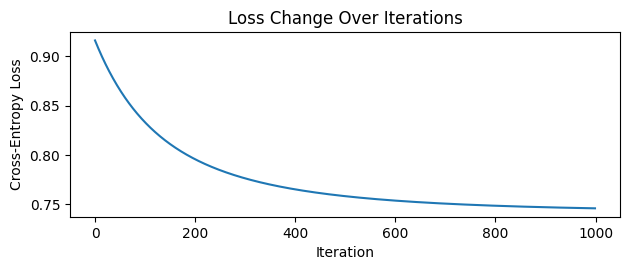

Accuracy on test data after training: 0.55
Loss after training: 0.745854425885921


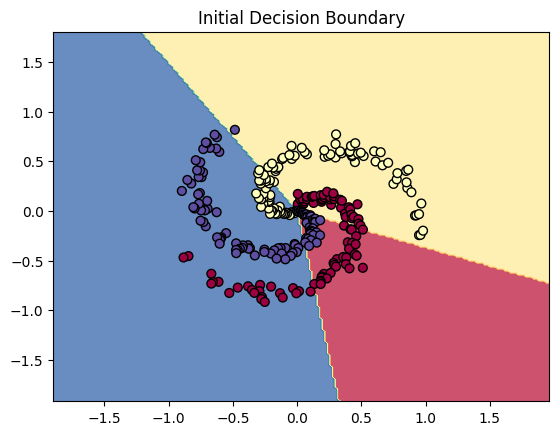

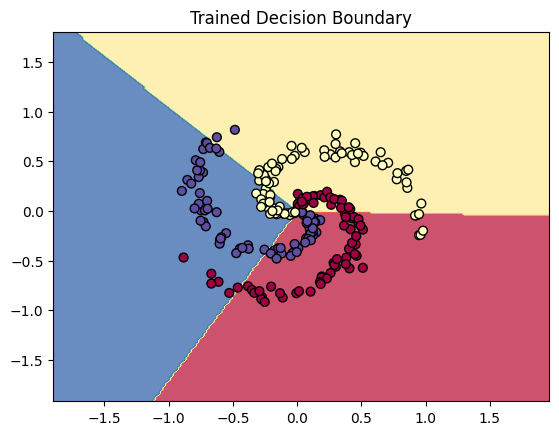

In [28]:

X_train, y_train, X_test, y_test = random_split_data(X, y)


W_trained, losses = train_classifier(
    X_train,
    y_train,
    W,
    learning_rate=0.1,
    num_epochs=1000
)
# Plotting Loss
plt.subplot(2, 1, 1)
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Cross-Entropy Loss')
plt.title('Loss Change Over Iterations')


plt.tight_layout()
plt.show()

Accuracy = calculate_accuracy(X_test, y_test, W_trained)
Loss = CrossEntropyLoss(X, y, W_trained)

print('Accuracy on test data after training:', Accuracy)
print('Loss after training:', Loss)
plot_decision_boundary("Initial Decision Boundary", X, y, W_Initial)
plot_decision_boundary("Trained Decision Boundary",
                       X_train, y_train, W_trained)

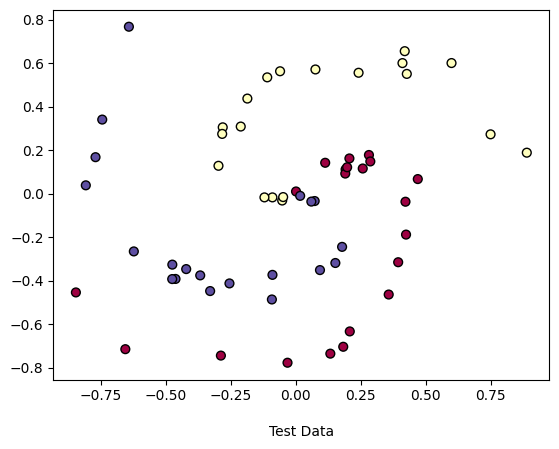

In [29]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=40, cmap=plt.cm.Spectral,edgecolors="k")
plt.xlabel('\nTest Data')
plt.show()

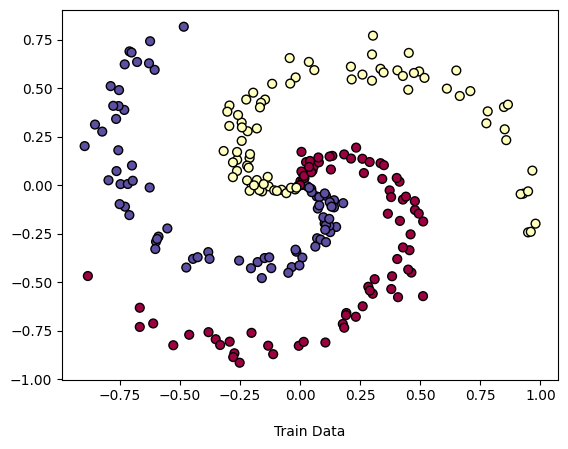

In [30]:
plt.scatter(X_train[:, 0], X_train[:, 1],
            c=y_train, s=40, cmap=plt.cm.Spectral,edgecolors="k")
plt.xlabel('\nTrain Data')

plt.show()